In [1]:
import os.path as op

from pathlib import Path


In [2]:
import mne

from mne_bids import BIDSPath, print_dir_tree, write_raw_bids

In [5]:
data_dir = Path(r"X:\brady_rse\Shared\Pavlov_test\source_data")
print_dir_tree(data_dir, max_depth=1)

|source_data\
|--- rest\
|--- video\


In [ ]:
#specifying the data directory (where sub-folders are)

In [7]:
children = [child for child in data_dir.iterdir()]
children

[WindowsPath('X:/brady_rse/Shared/Pavlov_test/source_data/rest'),
 WindowsPath('X:/brady_rse/Shared/Pavlov_test/source_data/video')]

In [ ]:
#2 sub folders- get paths for both folders

In [10]:
dir_number = 0
files = [file for file in children[dir_number].iterdir()]

In [ ]:
#listing all files in directory

In [14]:
file_path = files[0]
file_path

WindowsPath('X:/brady_rse/Shared/Pavlov_test/source_data/rest/CLV002.set')

In [ ]:
#getting first file in first sub-directory

In [15]:
data = mne.io.read_raw_eeglab(file_path)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_22252\4240071171.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  data = mne.io.read_raw_eeglab(file_path)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_22252\4240071171.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(file_path)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_22252\4240071171.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_path)


In [ ]:
#reading in the data

In [16]:
data

<RawEEGLAB | CLV002.set, 65 x 481064 (481.1 s), ~238.6 MiB, data loaded>

In [18]:
bids_root = op.join(data_dir.parent, "bids_example")
bids_root

'X:\\brady_rse\\Shared\\Pavlov_test\\bids_example'

In [ ]:
#creating a new file path (folder)

In [19]:
subject_id = "001"
task = "rest"

bids_path = BIDSPath(subject=subject_id, task=task, root=bids_root)
write_raw_bids(data, bids_path, overwrite=True, allow_preload=True, format="EEGLAB")

Writing 'X:\brady_rse\Shared\Pavlov_test\bids_example\participants.tsv'...
Writing 'X:\brady_rse\Shared\Pavlov_test\bids_example\participants.json'...
Writing 'X:/brady_rse/Shared/Pavlov_test/bids_example/sub-001/eeg/sub-001_space-CapTrak_electrodes.tsv'...
Writing 'X:/brady_rse/Shared/Pavlov_test/bids_example/sub-001/eeg/sub-001_space-CapTrak_coordsystem.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: [np.str_('S 20'), np.str_('S 21'), np.str_('boundary')]
Writing 'X:\brady_rse\Shared\Pavlov_test\bids_example\sub-001\eeg\sub-001_task-rest_events.tsv'...
Writing 'X:\brady_rse\Shared\Pavlov_test\bids_example\sub-001\eeg\sub-001_task-rest_events.json'...
Writing 'X:\brady_rse\Shared\Pavlov_test\bids_example\dataset_description.json'...
Writing 'X:\brady_rse\Shared\Pavlov_t

C:\Users\Daniel\AppData\Local\Temp\ipykernel_22252\1388993064.py:5: RuntimeWarning: Converting data files to EEGLAB format
  write_raw_bids(data, bids_path, overwrite=True, allow_preload=True, format="EEGLAB")


Writing 'X:\brady_rse\Shared\Pavlov_test\bids_example\sub-001\sub-001_scans.tsv'...
Wrote X:\brady_rse\Shared\Pavlov_test\bids_example\sub-001\sub-001_scans.tsv entry with eeg\sub-001_task-rest_eeg.set.


BIDSPath(
root: X:/brady_rse/Shared/Pavlov_test/bids_example
datatype: eeg
basename: sub-001_task-rest_eeg.set)

In [ ]:
#writing out data in BIDS format, investiating what it gives out- what exactly we have already
#what data is in these files, what needs to be added to fully flesh it out


This is what the initial run with no additional modification produces
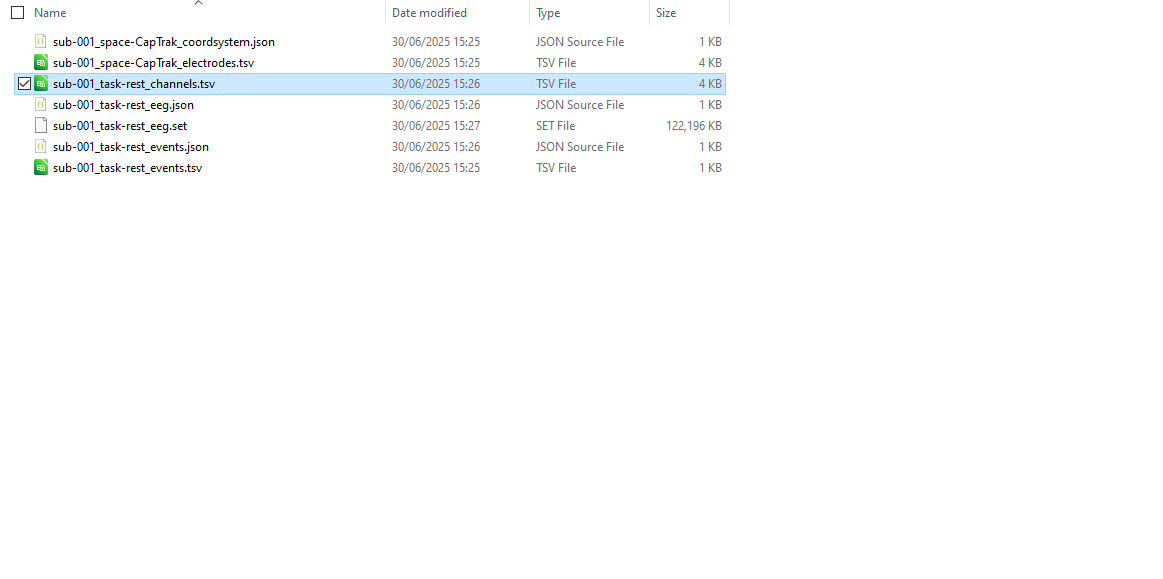

What do we need to add to make the information for this dataset 'complete'?
- Reference electrode
- Ground electrode
- Line freq
- Software Filters
- Manufacturer
- EEGPlacementScheme
- Additional channels (EOG, EMG, ECG, etc)

In [24]:
data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [ ]:
#goes through dictionary and collects all keys present, look in mne specification, what are each of these

In [26]:
data.info["device_info"]